<a href="https://colab.research.google.com/github/ElenaBinskaya/roduct_percents/blob/main/product_percents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Импорт библиотек, загрузка и анализ данных

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (12, 6)

In [ ]:
df_3min = pd.read_csv('3min Series (00sec) Outer new.csv')
df_avg_mass = pd.read_csv('Средняя масса доли АПГ New.csv')
target = pd.read_csv('target.csv', sep=';')

In [ ]:
print(f'Shape:{df_3min.shape}')
df_3min.head(3)

Shape:(52269, 19)


Date    Шум  Обратная ЭДС  Ср.прир.напр.  Сум.доз АПГ  \
0  30-Jul-18 22:46:00  0.016         2.277           -1.1          7.0   
1  30-Jul-18 22:49:00  0.014         2.277           -0.8          7.0   
2  30-Jul-18 22:52:00  0.016         2.277           -0.9          6.0   

   Board Temp. 1  Board Temp. 2  Board Temp. 3  Board Temp. 4  Board Temp. 5  \
0          234.0          311.0          285.0          267.0          333.0   
1          236.0          313.0          284.0          270.0          333.0   
2          236.0          312.0          281.0          270.0          331.0   

   Board Temp. 6  Board Temp. 7  Board Temp. 8  Board Temp. 9  Board Temp. 10  \
0          316.0          237.0          357.0          322.0           328.0   
1          318.0          243.0          358.0          324.0           328.0   
2          319.0          244.0          357.0          325.0           328.0   

   Board Face Temp. 1  Board Face Temp. 6  Board Deaf Temp. 1  \
0               296.0               295.0               250.0   
1               301.0               296.0               253.0   
2               301.0               296.0               253.0   

   Board Deaf Temp. 6  
0               218.0  
1               219.0  
2               219.0

In [ ]:
df_3min['Date'] = pd.to_datetime(df_3min['Date'])
df_3min = df_3min.sort_values(by='Date').reset_index(drop=True)
df_3min.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52269 entries, 0 to 52268
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                52269 non-null  datetime64[ns]
 1   Шум                 51327 non-null  float64       
 2   Обратная ЭДС        51327 non-null  float64       
 3   Ср.прир.напр.       49631 non-null  float64       
 4   Сум.доз АПГ         51328 non-null  float64       
 5   Board Temp. 1       50850 non-null  float64       
 6   Board Temp. 2       50850 non-null  float64       
 7   Board Temp. 3       50850 non-null  float64       
 8   Board Temp. 4       50850 non-null  float64       
 9   Board Temp. 5       50850 non-null  float64       
 10  Board Temp. 6       50850 non-null  float64       
 11  Board Temp. 7       50850 non-null  float64       
 12  Board Temp. 8       50850 non-null  float64       
 13  Board Temp. 9       50850 non-null  float64   

In [ ]:
df_3min.describe().T

count        mean        std      min      25%      50%  \
Шум                 51327.0    0.010835   0.006777    0.000    0.009    0.010   
Обратная ЭДС        51327.0    2.052781   0.150647    1.289    1.973    2.061   
Ср.прир.напр.       49631.0   -1.362521   3.660247 -140.100   -2.000   -1.100   
Сум.доз АПГ         51328.0    6.289998   1.980758    0.000    6.000    7.000   
Board Temp. 1       50850.0  239.418899  46.139258  120.000  211.000  233.000   
Board Temp. 2       50850.0  290.372566  61.769633  153.000  249.000  307.000   
Board Temp. 3       50850.0  309.904090  35.746542  238.000  280.000  306.000   
Board Temp. 4       50850.0  264.290226  20.280556  199.000  252.000  265.000   
Board Temp. 5       50850.0  371.570442  25.249745  278.000  358.000  376.000   
Board Temp. 6       50850.0  339.136185  30.054493  237.000  317.000  340.000   
Board Temp. 7       50850.0  333.605211  30.995085  236.000  315.000  339.000   
Board Temp. 8       50850.0  339.690816  26.941753  249.000  329.000  345.000   
Board Temp. 9       50850.0  334.219095  34.095414  259.000  308.000  337.000   
Board Temp. 10      50850.0  331.791524  46.751181  217.000  297.000  342.000   
Board Face Temp. 1  50850.0  291.776676  37.351892  145.000  271.000  296.000   
Board Face Temp. 6  50850.0  322.027630  29.127156  210.000  307.000  326.000   
Board Deaf Temp. 1  50850.0  295.120374  41.241374  132.000  275.000  300.000   
Board Deaf Temp. 6  50850.0  245.407591  30.498868  117.000  230.000  244.000   

                        75%     max  
Шум                   0.012    0.68  
Обратная ЭДС          2.149    2.37  
Ср.прир.напр.        -0.200   24.30  
Сум.доз АПГ           7.000   32.00  
Board Temp. 1       260.000  372.00  
Board Temp. 2       335.000  406.00  
Board Temp. 3       335.000  401.00  
Board Temp. 4       279.000  317.00  
Board Temp. 5       389.000  443.00  
Board Temp. 6       361.000  415.00  
Board Temp. 7       354.000  436.00  
Board Temp. 8       359.000  391.00  
Board Temp. 9       355.000  443.00  
Board Temp. 10      365.000  439.00  
Board Face Temp. 1  318.000  411.00  
Board Face Temp. 6  342.000  397.00  
Board Deaf Temp. 1  322.000  403.00  
Board Deaf Temp. 6  258.000  347.00

In [ ]:
print(f'Shape:{df_avg_mass.shape}')
df_avg_mass.tail(3)

Shape:(2028, 2)


Dateparse  avg_mass_apg
2025  23-Oct-18 08:00:00      0.494167
2026  23-Oct-18 09:00:00      0.494167
2027  23-Oct-18 10:00:00      0.494167

In [ ]:
df_avg_mass['Dateparse'] = pd.to_datetime(df_avg_mass['Dateparse'])

In [ ]:
df_avg_mass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2028 entries, 0 to 2027
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Dateparse     2028 non-null   datetime64[ns]
 1   avg_mass_apg  2028 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 31.8 KB


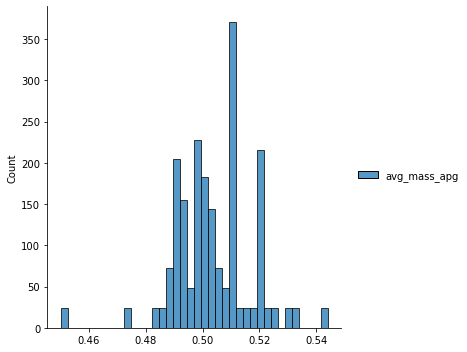

In [ ]:
sns.displot(df_avg_mass)

In [ ]:
print(f'Shape:{target.shape}')
target.head(3)

Shape:(166, 2)


Unnamed: 0  product_percents
0  2018-07-28 05:00:00              3.68
1  2018-07-28 14:00:00              3.49
2  2018-07-29 05:00:00              3.61

In [ ]:
target.columns=['Date','product_percents']
target['Date']= pd.to_datetime(target['Date'])

In [ ]:
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              166 non-null    datetime64[ns]
 1   product_percents  131 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.7 KB


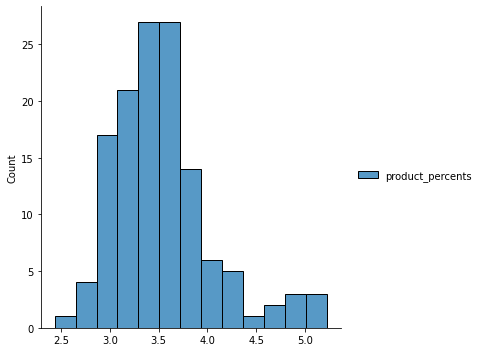

In [ ]:
sns.displot(target)

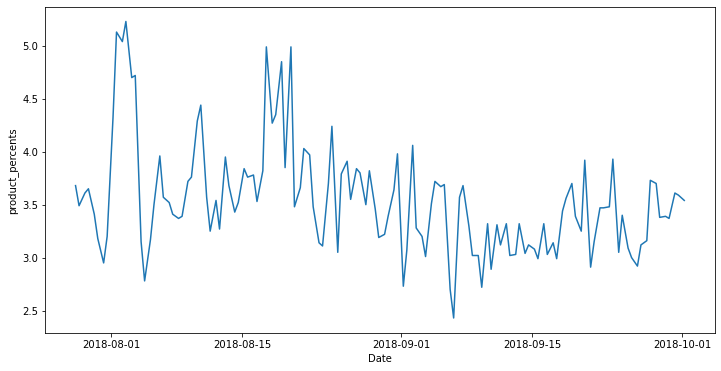

In [ ]:
sns.lineplot(data=target,x='Date',y='product_percents')

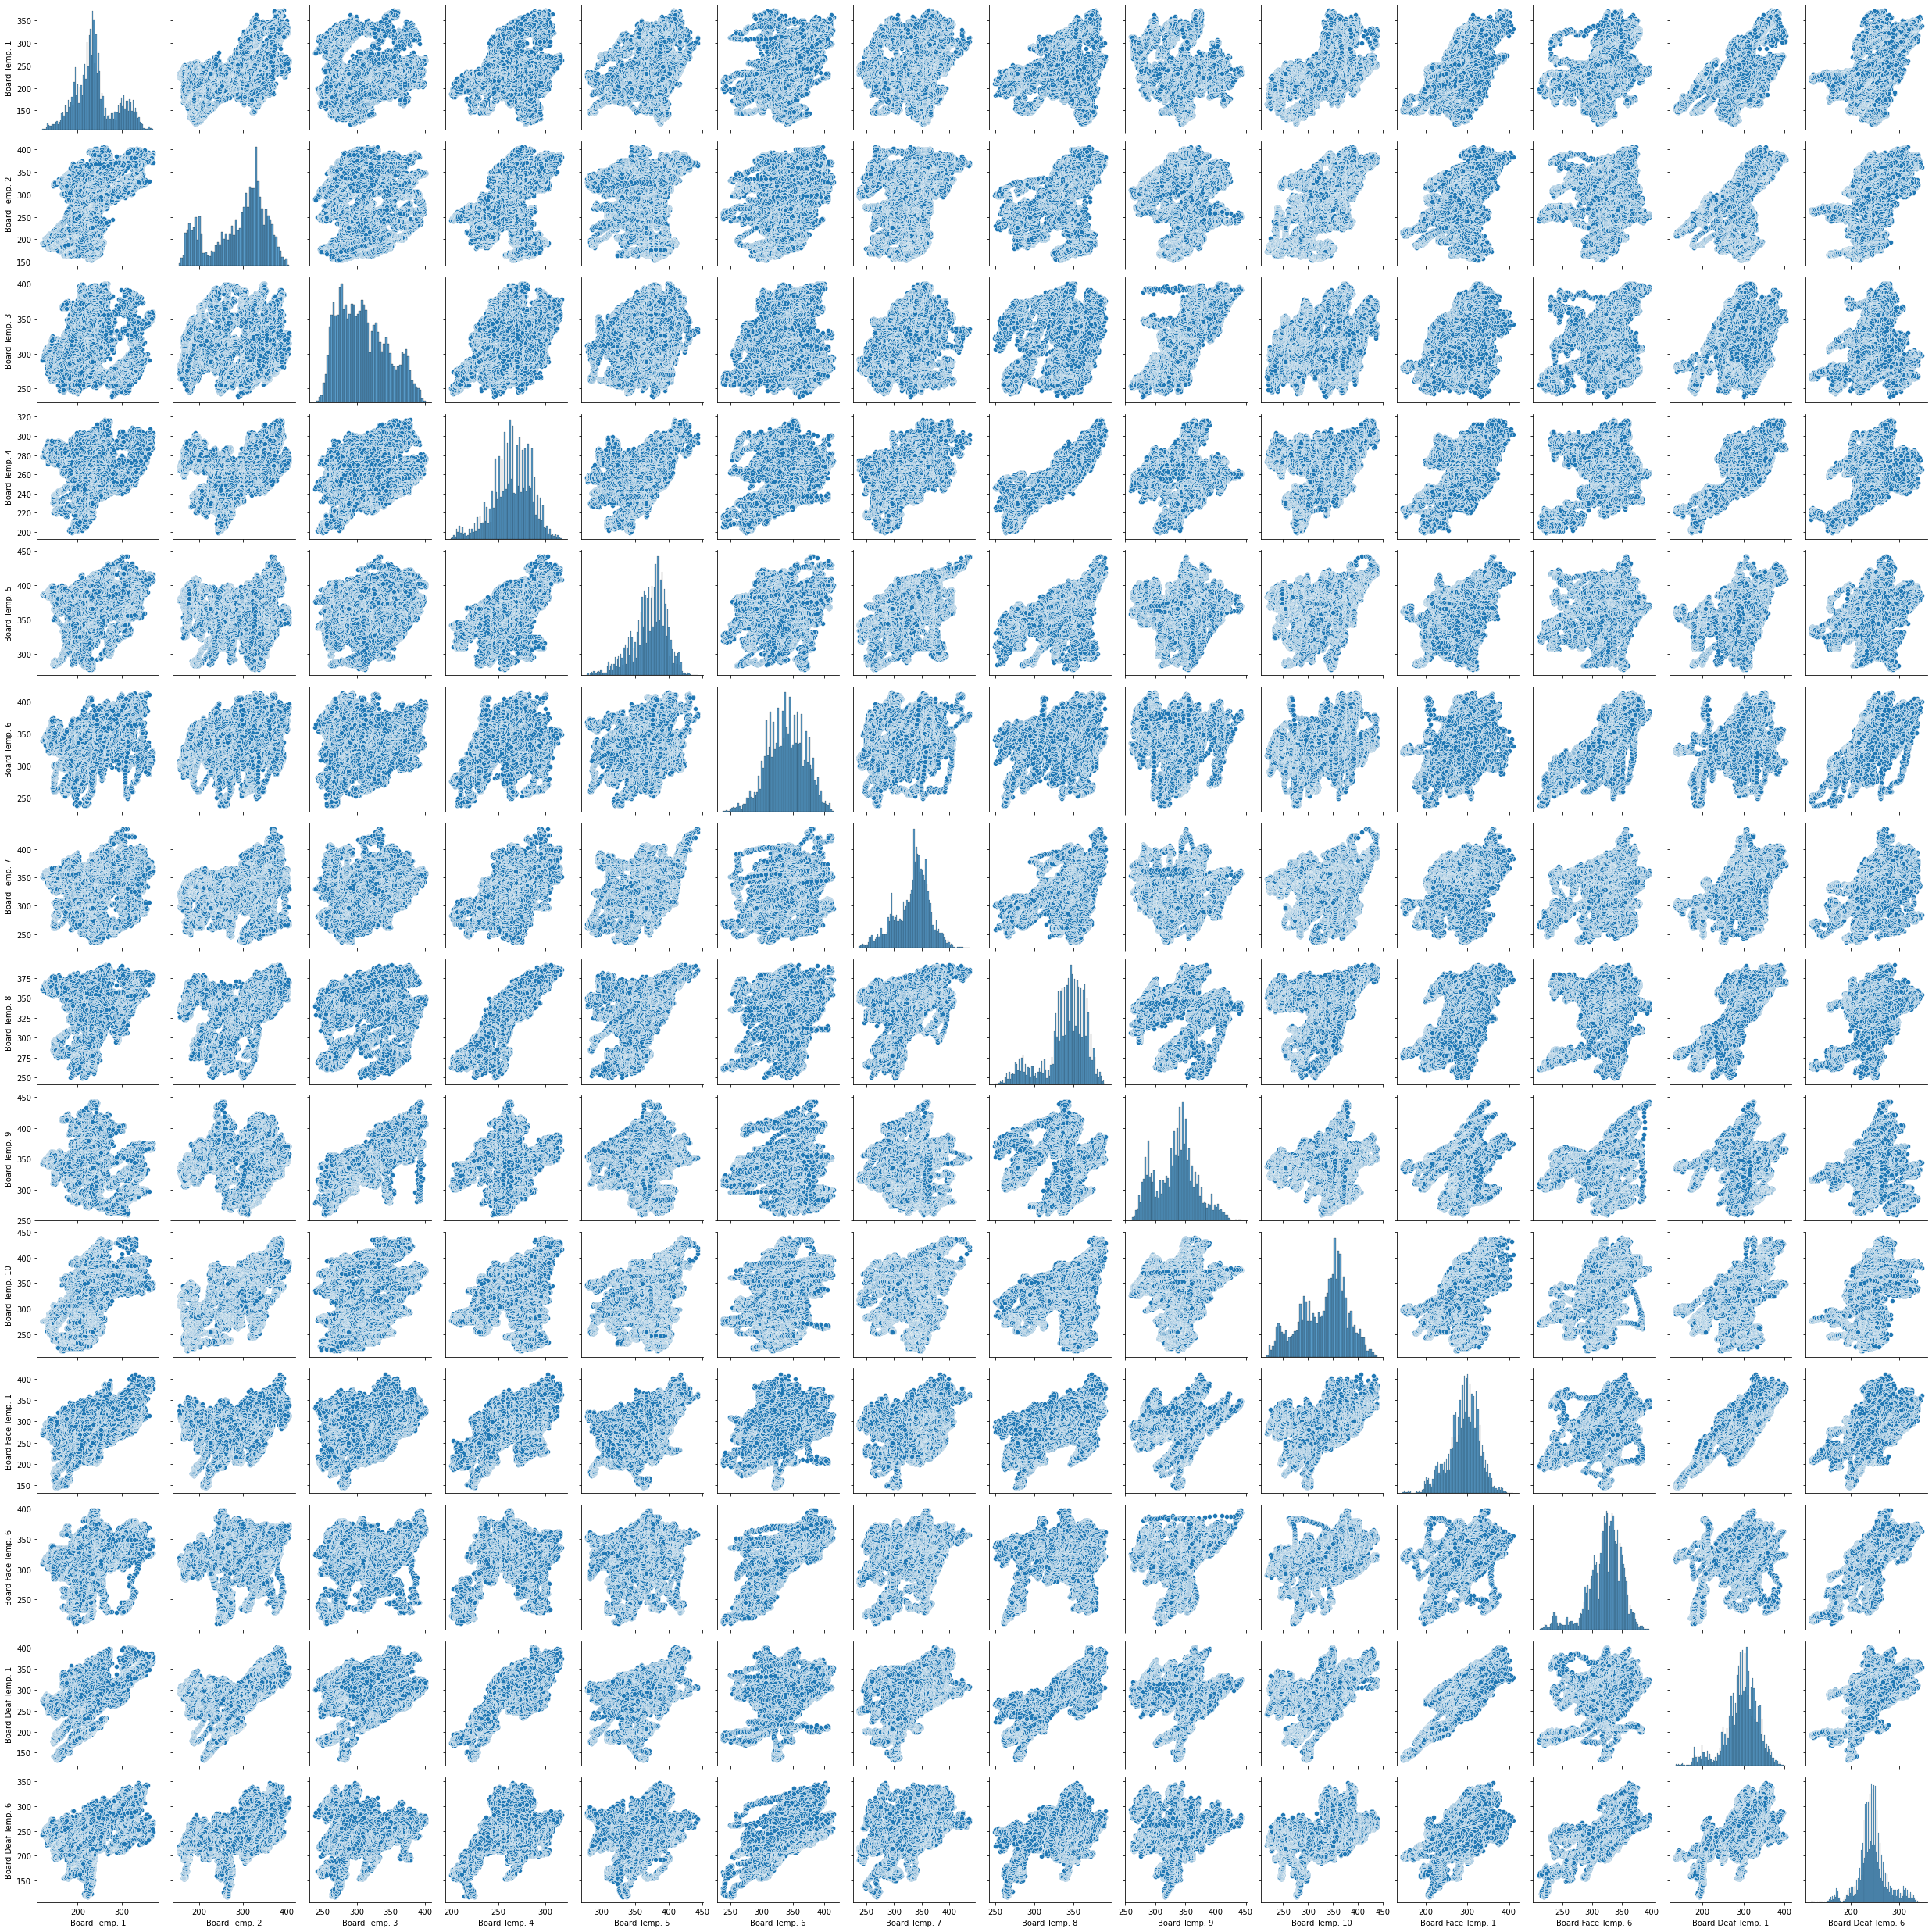

In [ ]:
cols_board = [col for col in df_3min.columns if 'Board' in col]

# c svg pairplot браузер работает медленно
%config InlineBackend.figure_format = 'png'
sns.pairplot(df_3min[cols_board])

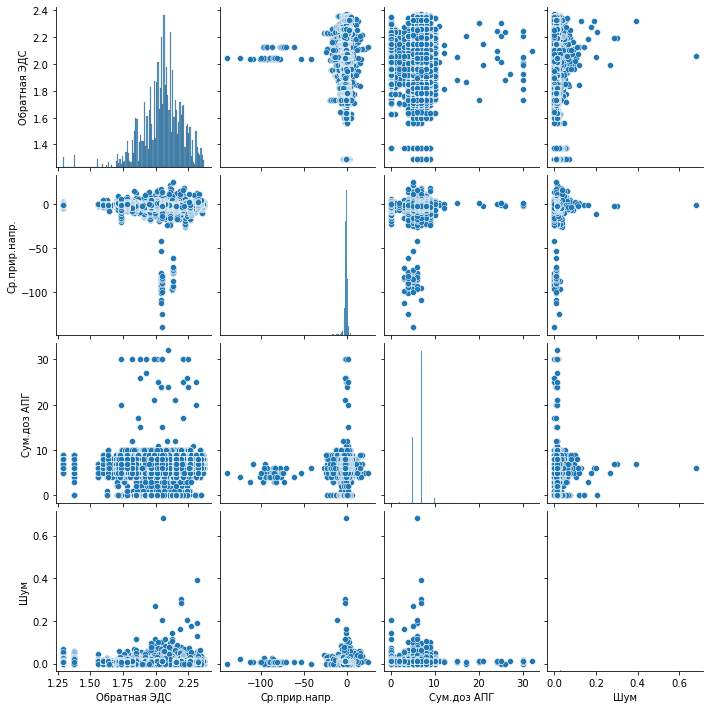

In [ ]:
cols = df_3min.columns.difference(cols_board+['Date'])
sns.pairplot(df_3min[cols])

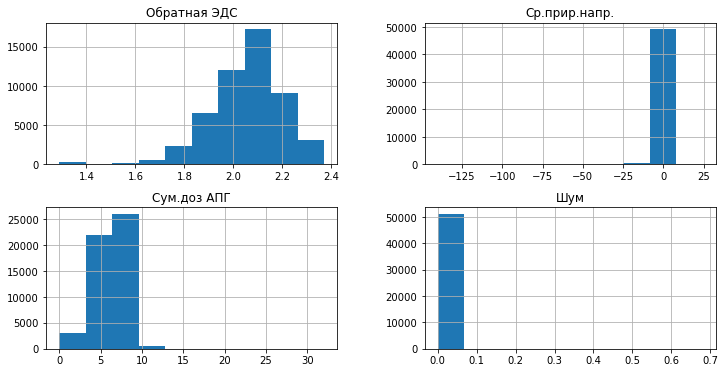

In [ ]:
df_3min[cols].hist();

### Подготовка данных

Соединим данные до размеров таблицы target.

In [ ]:
delta_time= target['Date'].iloc[2]-target['Date'].iloc[1]
delta_time

Timedelta('0 days 15:00:00')

In [ ]:
dict_avg_agg = {'avg_mass_apg': 'mean'}
dict_3min_agg = {'Шум': 'median',
            'Обратная ЭДС': 'median',
            'Ср.прир.напр.': 'median',
            'Сум.доз АПГ': 'sum',
            'Board Temp. 1': 'mean',
            'Board Temp. 2': 'mean',
            'Board Temp. 3': 'mean',
            'Board Temp. 4': 'mean',
            'Board Temp. 5': 'mean',
            'Board Temp. 6': 'mean',
            'Board Temp. 7': 'mean',
            'Board Temp. 8': 'mean',
            'Board Temp. 9': 'mean',
            'Board Temp. 10': 'mean',
            'Board Face Temp. 1': 'mean',
            'Board Face Temp. 6': 'mean',
            'Board Deaf Temp. 1': 'mean',
            'Board Deaf Temp. 6': 'mean'}

In [ ]:
df_new_values = []
for i in target.index:
    if i == 0:
        start = target['Date'].iloc[i]-delta_time
        end = target['Date'].iloc[i]
    else:
        start = target['Date'].iloc[i-1]
        end = target['Date'].iloc[i]

    df_3min_sub = df_3min[(df_3min['Date'] >= start) & (df_3min['Date'] < end)]
    df_avg_mass_sub = df_avg_mass[(df_avg_mass['Dateparse'] >= start) & (
        df_avg_mass['Dateparse'] < end)]
    df_new_values.append(np.concatenate((target.iloc[i].values, df_avg_mass_sub.agg(
        dict_avg_agg).values, df_3min_sub.agg(dict_3min_agg).values)))

Добавим новый признак, сколько массы было вброшено в период `Итог масс АПГ = Сум.доз АПГ * avg_mass_apg`.

In [ ]:
df_new = pd.DataFrame(df_new_values, columns=np.concatenate(
    (target.columns, df_avg_mass.columns[1:], df_3min.columns[1:])))
df_new['Итог масс АПГ']= df_new['Сум.доз АПГ']*df_new['avg_mass_apg']

In [ ]:
print(df_new.shape)
df_new.info()

(166, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                166 non-null    datetime64[ns]
 1   product_percents    131 non-null    float64       
 2   avg_mass_apg        160 non-null    float64       
 3   Шум                 163 non-null    float64       
 4   Обратная ЭДС        163 non-null    float64       
 5   Ср.прир.напр.       163 non-null    float64       
 6   Сум.доз АПГ         166 non-null    float64       
 7   Board Temp. 1       160 non-null    float64       
 8   Board Temp. 2       160 non-null    float64       
 9   Board Temp. 3       160 non-null    float64       
 10  Board Temp. 4       160 non-null    float64       
 11  Board Temp. 5       160 non-null    float64       
 12  Board Temp. 6       160 non-null    float64       
 13  Board Temp. 7       160 non-null    floa

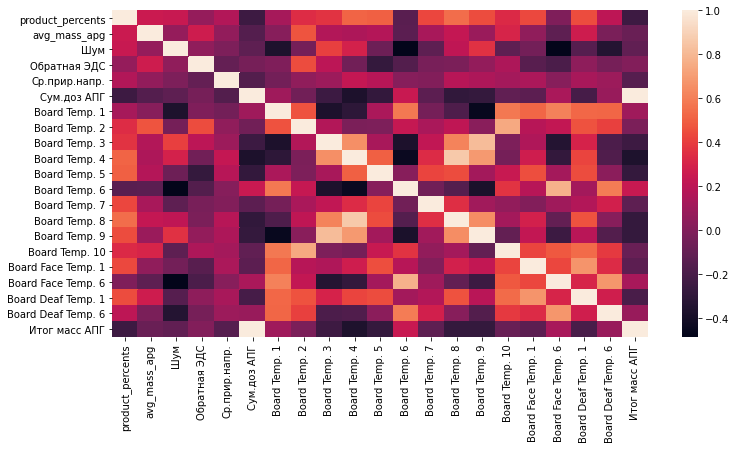

In [ ]:
sns.heatmap(df_new.corr())

### Построение моделей

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
import xgboost as xgb
from xgboost import XGBRegressor


from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error
from sklearn.model_selection import cross_val_score,train_test_split, GridSearchCV
from hyperopt import hp
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

MAPE

Средняя абсолютная процентная ошибка (MAPE) - один из наиболее часто используемых KPI для измерения точности прогнозов.
MAPE - это сумма отдельных абсолютных ошибок, деленная на спрос . Это средний процент ошибок.

$$M A P E=\frac{100 \%}{n} \Sigma\left|\frac{y-\widehat{y}}{y}\right|$$

Реализация в scikit-learn

$$\text{MAPE}(y, \hat{y}) = \frac{1}{n_{\text{samples}}} \sum_{i=0}^{n_{\text{samples}}-1} \frac{{}\left| y_i - \hat{y}_i \right|}{max(\epsilon, \left| y_i \right|)}$$

т.е. для получения результатов в % нужно умножить на 100%

In [ ]:
scaler = StandardScaler()
def gen_X_y(df):

    X = df[~df['product_percents'].isna()]
    X = X.fillna(X.median())
    X.drop(['Date', 'product_percents'], axis=1, inplace=True)
    X = scaler.fit_transform(X)
    y = df[~df['product_percents'].isna()]['product_percents']

    X_test = df[df['product_percents'].isna()]
    X_test.drop(['Date', 'product_percents'], axis=1, inplace=True)
    X_test = scaler.transform(X_test)
    return X, y, X_test

In [ ]:
X, y, X_test = gen_X_y(df_new)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
models={
'LinearRegression':LinearRegression(),
'Ridge':Ridge(),
'Lasso':Lasso(),
'DecisionTree':DecisionTreeRegressor(random_state=12),
'RandomForest':RandomForestRegressor(random_state=12),
'LGBM':LGBMRegressor(random_state=12),
'XGB':XGBRegressor()
}
for model in models.keys():
    models[model].fit(X_train, y_train)
    print(f"{model}(train): ",mean_absolute_percentage_error(y_train,models[model].predict(X_train)))
    print(f"{model}(valid): ",mean_absolute_percentage_error(y_val,models[model].predict(X_val)))

LinearRegression(train):  0.07034842722895901
LinearRegression(valid):  0.11220921133537169
Ridge(train):  0.07048287187982527
Ridge(valid):  0.10961530695785218
Lasso(train):  0.09602351556004876
Lasso(valid):  0.12395627226213946
DecisionTree(train):  0.0
DecisionTree(valid):  0.1275338265320451
RandomForest(train):  0.029576212722341306
RandomForest(valid):  0.09680846258710382
LGBM(train):  0.041640522538034234
LGBM(valid):  0.10760254592420684
XGB(train):  0.00014303791558691265
XGB(valid):  0.11179367537893417


Данных для обучения моделей слишком мало. Попробуем интерполировать значения целевой переменной на диапазон времени в таблице замеров df_3min.

In [ ]:
row_list = []
for i in range(target.shape[0]-1):
    dict_ = {}
    sub_df = df_3min[(df_3min['Date'] >= target['Date'].iloc[i]) & (
        df_3min['Date'] < target['Date'].iloc[i+1])]['Date']
    pr = np.linspace(target['product_percents'][i],
                     target['product_percents'][i+1], sub_df.shape[0]+1)

    for j, k in enumerate(sub_df.index):
        dict_ = dict({'Date': df_3min['Date'].iloc[k]})
        dict_.update(dict({'product_percents': pr[j]}))
        row_list.append(dict_)

df1 = pd.DataFrame(row_list)
print(df1.shape)
df1.head()

(39520, 2)


Date  product_percents
0 2018-07-28 05:01:00          3.680000
1 2018-07-28 05:04:00          3.678944
2 2018-07-28 05:07:00          3.677889
3 2018-07-28 05:10:00          3.676833
4 2018-07-28 05:13:00          3.675778

Заполним 'avg_mass_apg' в временных промежутках между замерами  

In [ ]:
row_list = []
for i in range(df_avg_mass.shape[0]-1):
    dict_ = {}
    sub_df = df_3min[(df_3min['Date'] >= df_avg_mass['Dateparse'].iloc[i]) & (
        df_3min['Date'] < df_avg_mass['Dateparse'].iloc[i+1])]['Date']
    avg_mass = np.full(sub_df.shape[0],df_avg_mass['avg_mass_apg'][i])

    for j, k in enumerate(sub_df.index):
        dict_ = dict({'Dateparse': df_3min['Date'].iloc[k]})
        dict_.update(dict({'avg_mass_apg': avg_mass[j]}))
        row_list.append(dict_)

df2 = pd.DataFrame(row_list)
print(df2.shape)
df2.head()

(40521, 2)


Dateparse  avg_mass_apg
0 2018-07-30 23:01:00           0.5
1 2018-07-30 23:04:00           0.5
2 2018-07-30 23:07:00           0.5
3 2018-07-30 23:10:00           0.5
4 2018-07-30 23:13:00           0.5

Соединим полученные таблицы и добавим признак 'Итог масс АПГ'

In [ ]:
df_new_inter = df1.merge(df2, left_on='Date', right_on='Dateparse',how='left')
df_new_inter=df_new_inter.merge(df_3min, on='Date',how='left' )
df_new_inter['Итог масс АПГ']= df_new_inter['Сум.доз АПГ']*df_new_inter['avg_mass_apg']
df_new_inter.drop('Dateparse',axis=1, inplace=True)
df_new_inter.shape

(39520, 22)

In [ ]:
X, y, X_test = gen_X_y(df_new_inter)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
for model in models.keys():
    models[model].fit(X_train, y_train)
    print(f"{model}(train): ",mean_absolute_percentage_error(y_train,models[model].predict(X_train)))
    print(f"{model}(valid): ",mean_absolute_percentage_error(y_val,models[model].predict(X_val)))

LinearRegression(train):  0.06843038234531319
LinearRegression(valid):  0.06817645341043037
Ridge(train):  0.06842794104565789
Ridge(valid):  0.0681739437399545
Lasso(train):  0.09633973827123274
Lasso(valid):  0.09753783765599919
DecisionTree(train):  0.00014317965985703233
DecisionTree(valid):  0.0042130229248521995
RandomForest(train):  0.0014376381150531224
RandomForest(valid):  0.0036268230557362576
LGBM(train):  0.012174857103316075
LGBM(valid):  0.013176536694634427
XGB(train):  0.007307915156729431
XGB(valid):  0.009557849656340368


На новых данных качество моделей значительно выросло. Попробуем настроить гиперпараметры у RandomForest и xgboost

In [ ]:
rf_1000 = RandomForestRegressor(n_estimators=1000, random_state=42)
rf_1000.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [ ]:
print("rf_1000(train): ",mean_absolute_percentage_error(y_train,rf_1000.predict(X_train)))
print("rf_1000(valid): ",mean_absolute_percentage_error(y_val,rf_1000.predict(X_val)))

rf_1000(train):  0.0013614534186025527
rf_1000(valid):  0.0035212592409891532


Увеличение количества деревьев дало небольшой прирост метрики качества

In [ ]:
parameters = {'max_features': [7,13,19], 'min_samples_leaf': [1,3,7], 'max_depth': [10,15,20]}
             
rf = RandomForestRegressor(n_estimators=1000, random_state=42,oob_score=True)
gcv = GridSearchCV(rf, parameters,cv=3, verbose=1)
gcv.fit(X_train, y_train)
gcv.best_params_

Fitting 3 folds for each of 27 candidates, totalling 81 fits


{'max_depth': 20, 'max_features': 13, 'min_samples_leaf': 1}

In [ ]:
print("gcv(train): ",mean_absolute_percentage_error(y_train,gcv.predict(X_train)))
print("gcv(valid): ",mean_absolute_percentage_error(y_val,gcv.predict(X_val)))

gcv(train):  0.001750601059675832
gcv(valid):  0.0036798740344120466


Настройка гиперпараметров для модели XGBRegressor()

In [ ]:
def score(params):

    print("Training with params:")
    print(params)
    params["max_depth"] = int(params["max_depth"])
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dvalid = xgb.DMatrix(X_val, label=y_val)
    model = xgb.train(params, dtrain, params["num_round"])
    predictions = model.predict(dvalid)
    score = mean_absolute_error(y_val, predictions)
    print("\tScore {0}\n\n".format(score))
    return {"loss": score, "status": STATUS_OK}


def optimize(trials):
    space = {
        'num_round': 10,
        'learning_rate': hp.quniform('eta', 0.05, 1, 0.01),
        'max_depth': hp.quniform('max_depth', 3, 14, 1),
        'min_child_weight': hp.quniform('min_child_weight', 1, 10, 1),
        'num_parallel_tree': hp.choice('num_parallel_tree', range(10, 150, 10)),
        'eval_metric': 'mae',
        'objective': 'reg:squarederror',
        'nthread': 4,
        'silent': 1
    }

    best = fmin(score, space, algo=tpe.suggest, trials=trials, max_evals=10)
    return best


trials = Trials()
best_params = optimize(trials)
best_params

Training with params:                                 
{'eval_metric': 'mae', 'learning_rate': 0.26, 'max_depth': 11.0, 'min_child_weight': 5.0, 'nthread': 4, 'num_parallel_tree': 100, 'num_round': 10, 'objective': 'reg:squarederror', 'silent': 1}
[14:53:14] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { num_round, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


	Score 0.15485249691618364                            


Training with params:                                                            
{'eval_metric': 'mae', 'learning_rate': 0.89, 'max_depth': 8.0, 'min_child_weight': 5.0, 'nthread': 4, 'num_parallel_tree': 10, 'num_round': 10, 'objective': 'reg:squarederror', 'silent': 1}
[14:53:27] WARNING: /Users

{'eta': 0.8300000000000001,
 'max_depth': 12.0,
 'min_child_weight': 7.0,
 'num_parallel_tree': 9}

In [ ]:
best_params['max_depth'] = int(best_params['max_depth'])
best_params['eval_metric'] = 'mae'
best_params['objective'] = 'reg:squarederror'
best_params['nthread'] = 4

In [ ]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_val, label=y_val)
watchlist  = [(dtrain,'train'), (dvalid,'valid')]
xgb_model = xgb.train(best_params, dtrain, 1000, watchlist, early_stopping_rounds=50)

[0]	train-mae:0.52329	valid-mae:0.52061
Multiple eval metrics have been passed: 'valid-mae' will be used for early stopping.

Will train until valid-mae hasn't improved in 50 rounds.
[1]	train-mae:0.10399	valid-mae:0.10681
[2]	train-mae:0.04360	valid-mae:0.05036
[3]	train-mae:0.03192	valid-mae:0.04158
[4]	train-mae:0.03018	valid-mae:0.04044
[5]	train-mae:0.02802	valid-mae:0.03922
[6]	train-mae:0.02685	valid-mae:0.03908
[7]	train-mae:0.02496	valid-mae:0.03809
[8]	train-mae:0.02376	valid-mae:0.03736
[9]	train-mae:0.02316	valid-mae:0.03727
[10]	train-mae:0.02232	valid-mae:0.03695
[11]	train-mae:0.02173	valid-mae:0.03668
[12]	train-mae:0.02140	valid-mae:0.03657
[13]	train-mae:0.02124	valid-mae:0.03657
[14]	train-mae:0.02082	valid-mae:0.03668
[15]	train-mae:0.02017	valid-mae:0.03665
[16]	train-mae:0.01983	valid-mae:0.03641
[17]	train-mae:0.01960	valid-mae:0.03635
[18]	train-mae:0.01906	valid-mae:0.03638
[19]	train-mae:0.01837	valid-mae:0.03635
[20]	train-mae:0.01827	valid-mae:0.03629
[21]	t

In [ ]:
print("xgb_model(train): ",mean_absolute_percentage_error(y_train,xgb_model.predict(dtrain)))
print("xgb_model(valid): ",mean_absolute_percentage_error(y_val,xgb_model.predict(dvalid)))

xgb_model(train):  0.000992877689300132
xgb_model(valid):  0.009261788020807855


Показатели метрик немного выросли с 0.0095 до 0.0093 на валидационной выборке

In [ ]:
pred_rf = pd.concat([df_new_inter['Date'], pd.DataFrame(
    rf_1000.predict(X), columns=['percent'])], axis=1)
pred_xgb = pd.concat([df_new_inter['Date'], pd.DataFrame(
    xgb_model.predict(xgb.DMatrix(X)), columns=['percent'])], axis=1)

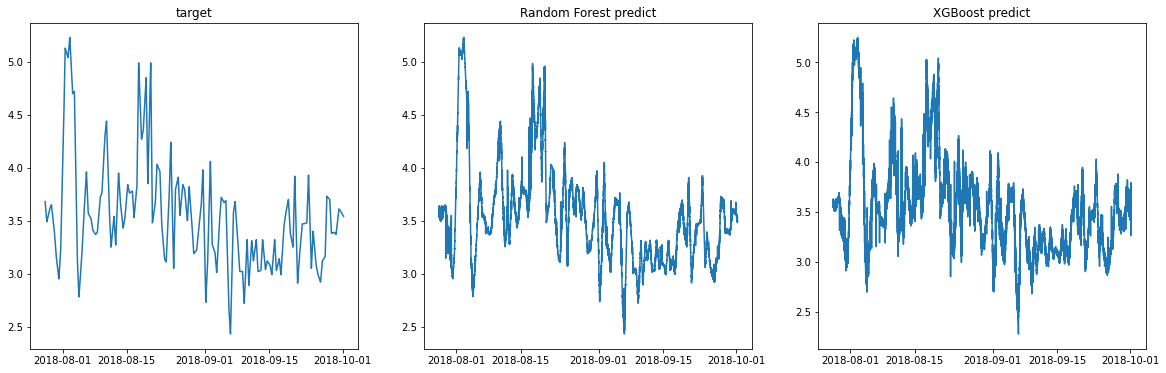

In [ ]:
plt.rcParams['figure.figsize'] = (20, 6)
fig, ax = plt.subplots(1, 3)
ax[0].plot(df1.set_index('Date'))
ax[0].set_title('target')
ax[1].plot(pred_rf.set_index('Date'))
ax[1].set_title('Random Forest predict')
ax[2].plot(pred_xgb.set_index('Date'))
ax[2].set_title("XGBoost predict")
plt.show()


Вывод:
- Интерполяция таргета и использование максимального количества данных  положительно влияют на точность предсказания модели
- Модели RandomForest и XGBoost неплохо улавливают изменение количества процентного содержания продукта в смеси
- Лучший результат: MAPE=0.35% на валидационной выборке у модели RandomForest


In [ ]:
# !pipreqsnb /Users/Elena/Desktop/test/Data --force